<a href="https://colab.research.google.com/github/a-winders/MLA_ATW/blob/main/MLA2_ATW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 2
# Adam Winders 
# CS430-ON 
# Machine Learning in the Cloud

<br>
<br>
<br>

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook. <br> <br>
**Include imports for both Linear Regression and Logistic Regression**

In [ ]:
# Imports LinearRegression & LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

Linear Regression - Acquire data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430_Data_Files/Steel_industry_data.csv')

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

## Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

## ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

<br>
<br>

# **Problem 1**

Renames the columns according to **Table 1: Columns Names**

In [ ]:
# displays old column names with first 5 rows
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
# renames columns
df.rename(columns=
          {'Usage_kWh':'usage_kwh'
          ,'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh'
          ,'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh'
          ,'Lagging_Current_Power_Factor':'lag_current_pwr'
          ,'Leading_Current_Power_Factor':'lead_current_pwr'
          ,'NSM':'nsm'
          ,'WeekStatus':'week_status'
          ,'Day_of_week':'day_of_week'
          ,'Load_Type':'load_type'
           }, inplace = True)


In [ ]:
# displays new column names
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


##Statistics and Visual Exploration

Summarize the numerical columns of data

In [ ]:
df.describe()

,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


Get the counts of the different load types. Save this into a data frame so you can plot it.

In [ ]:
# displays data types of each column
df.dtypes

date                     object
usage_kwh               float64
lag_react_pwr_kvarh     float64
lead_react_pwr_kvarh    float64
CO2(tCO2)               float64
lag_current_pwr         float64
lead_current_pwr        float64
nsm                       int64
week_status              object
day_of_week              object
load_type                object
dtype: object

In [ ]:
df.load_type

0        Light_Load
1        Light_Load
2        Light_Load
3        Light_Load
4        Light_Load
            ...    
35035    Light_Load
35036    Light_Load
35037    Light_Load
35038    Light_Load
35039    Light_Load
Name: load_type, Length: 35040, dtype: object

In [ ]:
load_weight = ['18072']
load_type= df['load_type'].groupby(df['load_type']).count()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ordinal_encoder = OrdinalEncoder()
load_type_cat = df[['load_type']]
load_type_encoded = ordinal_encoder.fit_transform(load_type_cat)

In [ ]:
load_type_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehot_encoder = OneHotEncoder()
load_type_encoded = onehot_encoder.fit_transform(load_type_cat)

In [ ]:
onehot_encoder.categories_

[array(['Light_Load', 'Maximum_Load', 'Medium_Load'], dtype=object)]

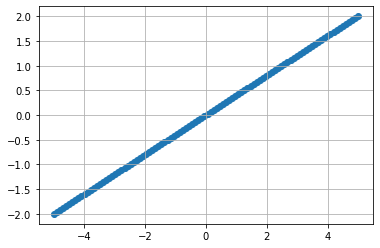

In [ ]:
linear1x = np.linspace(-5,5, num=100).reshape(-1,1)
linear1y = np.linspace(-2,2, num=100) 
plt.scatter(linear1x,linear1y)
plt.grid(True)

Create a barplot to view how many days fall under each load type. The size of the plot should be 10 x 5.

<Axes: title={'center': 'Days in Each Load Type'}, xlabel='load_type'>

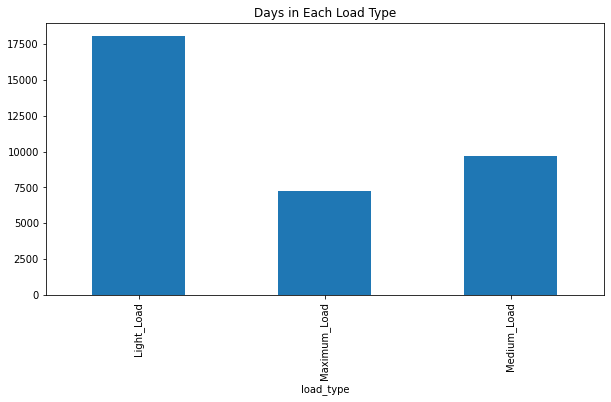

In [ ]:
load_type.plot(kind='bar', figsize=(10,5), title='Days in Each Load Type')

Create a pairplot of all of the numerical variables using Seaborn

In [ ]:
# sns.set(style="ticks", color_codes=True) sns.pairplot(df)

SyntaxError: ignored

In a markdown comment - write up any interesting patterns you see from the pairplot

**TODO**

## Splitting Data into Train/Test

Create a data frame called X of your inputs that includes all columns except data and usage_kwh
<br>
<br>
Create a data frame called y of your output that includes only usage_kwh. This will be your target variable that you are trying to predict.

In [ ]:
X = df[['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status', 'day_of_week', 'load_type']]
y = df['usage_kwh']

Split the data into Train/Test sets. Use 20% of the data for testing. You should have 4 data frames: **X_train, X_test, y_train, y_test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [ ]:
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,1,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,Monday,Light_Load


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

ValueError: ignored

## Building the Pipeline

Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output)

In [ ]:
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [ ]:
num_attribs = ['lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm'] 
cat_attribs = ['week_status','day_of_week','load_type']

Create a pipeline that will transform the data and then run a Linear Regression

In [ ]:
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attribs),
                               ('num',MinMaxScaler(), num_attribs),]
                  )

In [ ]:
pipeline = Pipeline([
                      ('transform',col_transform),
                      ('mlr_model',LinearRegression())
])

In [ ]:
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr_model', LinearRegression())])

## Executing the Model

Run the pipeline to fit the Linear Regression Model

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr_model', LinearRegression())])

## Evaluating the Model

Run the pipeline to predict y values from the test data set and save them in a variable called **y_pred**

In [ ]:
y_pred = pipeline.predict(X_test)

Calcuate the root mean squared error for both train and test. In a markdown comment below the result, interpret the output you receive.

Calculate the R-squared value of the model (test only). In a markdown comment below the result, interpret the output you receive.

In [ ]:
r2_score(y_pred, y_test)

0.976289382780047

Write the code to display the intercept value (bias) and coefficients of the model. **(These will be two different lines of code).**

In [ ]:
pipeline.named_steps['mlr_model'].intercept_

344915748065639.4

In [ ]:
pipeline.named_steps['mlr_model'].coef_

array([-5.08872671e+13, -3.90983168e+13, -6.89619855e+13, -6.89619855e+13,
       -8.07509358e+13, -8.07509358e+13, -6.89619855e+13, -6.89619855e+13,
       -6.89619855e+13, -2.25066496e+14, -2.25066496e+14, -2.25066496e+14,
        2.90083845e+01,  1.91419272e+00,  1.17473851e+02,  6.99739086e+00,
        4.74945300e+00, -3.54024887e-01])

## Conclusion

In a markdown comment, write a conclusion on how suitable you think this model is for predicting kwh usage.

<br>
<br>

# **Problem 2**

## Reading the data

 Recodes the 'week_status' column so a Weekday is coded as 1 and a Weekend is coded as a 0.

In [ ]:
# displays week_status column before conversion
weekday_weekend = df[["week_status","day_of_week"]]
weekday_weekend

,week_status,day_of_week
0,1,Monday
1,1,Monday
2,1,Monday
3,1,Monday
4,1,Monday
...,...,...
35035,1,Monday
35036,1,Monday
35037,1,Monday
35038,1,Monday


In [ ]:
df['week_status'] = df['week_status'].apply(lambda x: 1 if x == "Weekday" else 0)

In [ ]:
df.day_of_week.groupby(df.day_of_week).count()

day_of_week
Friday       4992
Monday       5088
Saturday     4992
Sunday       4992
Thursday     4992
Tuesday      4992
Wednesday    4992
Name: day_of_week, dtype: int64

## Splitting Data into Train/Test

In [ ]:
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,Monday,1
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,Monday,1
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,Monday,1
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,Monday,1
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,Monday,1


In [ ]:
X = df[['usage_kwh'
,'lag_react_pwr_kvarh'
, 'lead_react_pwr_kvarh'
, 'CO2(tCO2)'
, 'lag_current_pwr'
, 'lead_current_pwr'
, 'nsm'
, 'load_type']]
y = df['week_status']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=32)

## Building the Pipeline

Creates a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables

In [ ]:
num_attribs = ['usage_kwh'
, 'lag_react_pwr_kvarh'
,'lead_react_pwr_kvarh'
,'CO2(tCO2)'
,'lag_current_pwr'
,'lead_current_pwr'
,'nsm']

cat_attribs = ['load_type']

In [ ]:
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attribs),
                               ('num',MinMaxScaler(), num_attribs),]
                  )

Creates a pipeline that will transform the data and then run a Logistic Regression

In [ ]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('mlr', LogisticRegression(max_iter=1000)),
                     ])

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
pipeline.fit(X_train, np.ravel(y_train))

ValueError: ignored

## Executing the Model

In [ ]:
y_pred = pipeline.predict(X_test)

AttributeError: ignored

## Evaluating the Model

## Conclusion
<br>
Write a general conclusion about the results of your model